In [39]:
#Import the dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from citipy import citipy
from config import weather_api_key
import requests

In [40]:
#Create a set of random latitude and longitude combinations

lats = np.random.uniform(low = -90, high = 90, size = 1500)

lngs = np.random.uniform(low = -180, high = 180, size = 1500)

lat_lngs = zip(lats, lngs)

lat_lngs


In [41]:
#Add latitudes and longitudes to alist

coordinates = list(lat_lngs)

In [42]:
#Create a list for holding the cities

cities = []

#Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
#Print the city count to confirm sufficent count

print(len(cities))

605


In [43]:
#Import the time library and the datetime module from the datetime library

import time

from datetime import datetime



In [44]:
cities[:20]

['mar del plata',
 'porto santo',
 'haines junction',
 'albany',
 'ushuaia',
 'hobart',
 'nikolskoye',
 'lolua',
 'barrow',
 'cururupu',
 'illoqqortoormiut',
 'busselton',
 'panipat',
 'ancud',
 'mamallapuram',
 'puerto ayora',
 'cozumel',
 'farafangana',
 'kilrush',
 'hilo']

In [49]:
#Create an empty list to hold the weather data.

city_data = []

#Create the url


url = f'https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}'

#Print the beginning of the logging.

print('Beginning Data Retrieval        ')

print('--------------------------------')

#Create the counters.

record_count = 1

set_count = 1

#Loop through all the cities in our list.

    
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.

    if(i % 50 == 0 and i>= 50):

        set_count += 1

        record_count = 1

        time.sleep(60)

    #Create enpoint URL with each city.

    city_url = url+'&q='+city.replace(' ','+')

    #log the URL, record, and set numbers and the city

    print(f'Processing Record {record_count} of Set{set_count} | {city}')

    #Add 1 to the record count.

    record_count += 1
        
    #Run an API request for each of the cities

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set1 | mar del plata
Processing Record 2 of Set1 | porto santo
Processing Record 3 of Set1 | haines junction
Processing Record 4 of Set1 | albany
Processing Record 5 of Set1 | ushuaia
Processing Record 6 of Set1 | hobart
Processing Record 7 of Set1 | nikolskoye
Processing Record 8 of Set1 | lolua
City not found. Skipping...
Processing Record 9 of Set1 | barrow
Processing Record 10 of Set1 | cururupu
Processing Record 11 of Set1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set1 | busselton
Processing Record 13 of Set1 | panipat
Processing Record 14 of Set1 | ancud
Processing Record 15 of Set1 | mamallapuram
Processing Record 16 of Set1 | puerto ayora
Processing Record 17 of Set1 | cozumel
Processing Record 18 of Set1 | farafangana
Processing Record 19 of Set1 | kilrush
Processing Record 20 of Set1 | hilo
Processing Record 21 of Set1 | karratha
Processing Record 22 of Set1 |

Processing Record 40 of Set4 | wonthaggi
Processing Record 41 of Set4 | valjala
City not found. Skipping...
Processing Record 42 of Set4 | kamaishi
Processing Record 43 of Set4 | hami
Processing Record 44 of Set4 | east london
Processing Record 45 of Set4 | aksarka
Processing Record 46 of Set4 | kailua
Processing Record 47 of Set4 | ziro
Processing Record 48 of Set4 | utete
Processing Record 49 of Set4 | bilma
Processing Record 50 of Set4 | semnan
Processing Record 1 of Set5 | pangnirtung
Processing Record 2 of Set5 | ridgecrest
Processing Record 3 of Set5 | puerto rico
Processing Record 4 of Set5 | severo-kurilsk
Processing Record 5 of Set5 | shingu
Processing Record 6 of Set5 | arcachon
Processing Record 7 of Set5 | bethel
Processing Record 8 of Set5 | watertown
Processing Record 9 of Set5 | tilichiki
Processing Record 10 of Set5 | fairbanks
Processing Record 11 of Set5 | beaverlodge
Processing Record 12 of Set5 | vila franca do campo
Processing Record 13 of Set5 | sfantu gheorghe
Pr

Processing Record 38 of Set8 | senador guiomard
Processing Record 39 of Set8 | tautira
Processing Record 40 of Set8 | loandjili
Processing Record 41 of Set8 | dunedin
Processing Record 42 of Set8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set8 | turukhansk
Processing Record 44 of Set8 | jubayl
City not found. Skipping...
Processing Record 45 of Set8 | tagusao
Processing Record 46 of Set8 | berlevag
Processing Record 47 of Set8 | khasan
Processing Record 48 of Set8 | bukoba
Processing Record 49 of Set8 | san cristobal
Processing Record 50 of Set8 | oga
Processing Record 1 of Set9 | huangpi
Processing Record 2 of Set9 | provideniya
Processing Record 3 of Set9 | caravelas
Processing Record 4 of Set9 | poshekhonye
Processing Record 5 of Set9 | kinsale
Processing Record 6 of Set9 | katherine
Processing Record 7 of Set9 | one hundred mile house
City not found. Skipping...
Processing Record 8 of Set9 | vostok
Processing Record 9 of Set9 | tual
Processing Reco

Processing Record 29 of Set12 | katsuura
Processing Record 30 of Set12 | kenai
Processing Record 31 of Set12 | addis zemen
City not found. Skipping...
Processing Record 32 of Set12 | chincha alta
Processing Record 33 of Set12 | san vicente de canete
Processing Record 34 of Set12 | conde
Processing Record 35 of Set12 | port said
Processing Record 36 of Set12 | sosnovo-ozerskoye
Processing Record 37 of Set12 | koboko
Processing Record 38 of Set12 | port macquarie
Processing Record 39 of Set12 | kaniama
Processing Record 40 of Set12 | oranjemund
Processing Record 41 of Set12 | kingston
Processing Record 42 of Set12 | anloga
Processing Record 43 of Set12 | grimshaw
Processing Record 44 of Set12 | mutsamudu
City not found. Skipping...
Processing Record 45 of Set12 | keffi
Processing Record 46 of Set12 | bereda
Processing Record 47 of Set12 | buta
Processing Record 48 of Set12 | donegal
Processing Record 49 of Set12 | songjianghe
Processing Record 50 of Set12 | kununurra
Processing Record 1 

In [50]:
len(city_data)

561

In [51]:
#convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,49.08,88,0,10.36,AR,2022-08-08 23:03:46
1,Porto Santo,33.0720,-16.3415,71.98,68,40,13.80,PT,2022-08-08 23:03:47
2,Haines Junction,60.7522,-137.5108,55.38,62,99,8.77,CA,2022-08-08 23:03:47
3,Albany,42.6001,-73.9662,90.63,55,50,7.96,US,2022-08-08 23:02:43
4,Ushuaia,-54.8000,-68.3000,32.61,85,89,8.93,AR,2022-08-08 23:00:27
5,Hobart,-42.8794,147.3294,39.27,93,20,6.91,AU,2022-08-08 22:59:35
6,Nikolskoye,59.7035,30.7861,56.80,96,72,0.85,RU,2022-08-08 23:03:49
7,Barrow,71.2906,-156.7887,48.22,61,0,10.36,US,2022-08-08 23:03:50
8,Cururupu,-1.8283,-44.8683,75.36,89,8,4.72,BR,2022-08-08 23:03:51
9,Busselton,-33.6500,115.3333,47.41,83,98,13.13,AU,2022-08-08 23:03:52


In [52]:
#Rearrange the columns

column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-08-08 23:03:46,-38.0023,-57.5575,49.08,88,0,10.36
1,Porto Santo,PT,2022-08-08 23:03:47,33.0720,-16.3415,71.98,68,40,13.80
2,Haines Junction,CA,2022-08-08 23:03:47,60.7522,-137.5108,55.38,62,99,8.77
3,Albany,US,2022-08-08 23:02:43,42.6001,-73.9662,90.63,55,50,7.96
4,Ushuaia,AR,2022-08-08 23:00:27,-54.8000,-68.3000,32.61,85,89,8.93


In [53]:
#create the output file (csv)

output_data_file = 'weather_data/cities.csv'

#Export the city data into csv

city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [54]:
#Extract relevant fields from the DataFrame for plotting.

import time

city_data_df = pd.read_csv('weather_data/cities.csv')

lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

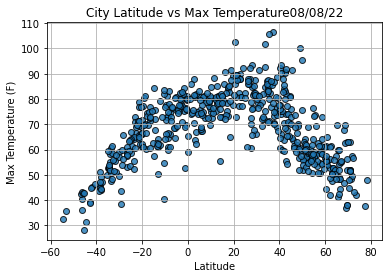

In [56]:
#Build the scatter plot for latitude vs Max temperature.

plt.scatter (lats,
            max_temps,
            edgecolor = 'black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#Incorporate the other graph properties.

plt.title(f'City Latitude vs Max Temperature' + time.strftime('%x'))
          
plt.ylabel('Max Temperature (F)')

plt.xlabel('Latitude')
          
plt.grid(True)
          
#Save the figure.
          
          
plt.savefig('weather_data/Fig1.png')
          
#Show plot.
          
plt.show()

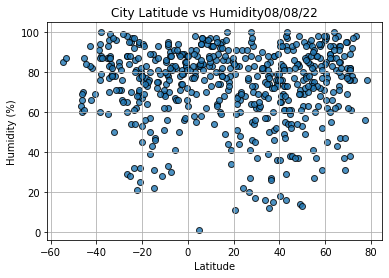

In [58]:
#Build the scatter plot for latitude vs humidity.

plt.scatter (lats,
            humidity,
            edgecolor = 'black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#Incorporate the other graph properties.

plt.title(f'City Latitude vs Humidity' + time.strftime('%x'))
          
plt.ylabel('Humidity (%)')

plt.xlabel('Latitude')
          
plt.grid(True)
          
#Save the figure.
          
          
plt.savefig('weather_data/Fig2.png')
          
#Show plot.
          
plt.show()

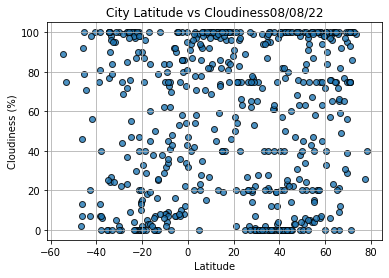

In [59]:
#Build the scatter plot for latitude vs cloudiness.

plt.scatter (lats,
            cloudiness,
            edgecolor = 'black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#Incorporate the other graph properties.

plt.title(f'City Latitude vs Cloudiness' + time.strftime('%x'))
          
plt.ylabel('Cloudiness (%)')

plt.xlabel('Latitude')
          
plt.grid(True)
          
#Save the figure.
          
          
plt.savefig('weather_data/Fig3.png')
          
#Show plot.
          
plt.show()

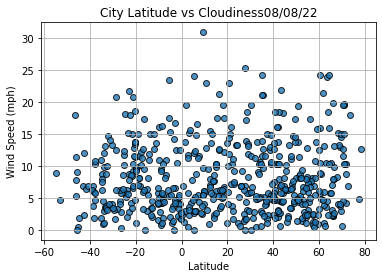

In [60]:
#Build the scatter plot for latitude vs wind speed.

plt.scatter (lats,
            wind_speed,
            edgecolor = 'black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#Incorporate the other graph properties.

plt.title(f'City Latitude vs Cloudiness' + time.strftime('%x'))
          
plt.ylabel('Wind Speed (mph)')

plt.xlabel('Latitude')
          
plt.grid(True)
          
#Save the figure.
          
          
plt.savefig('weather_data/Fig4.png')
          
#Show plot.
          
plt.show()

In [64]:
#import lineregress

from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    
    regress_values = slope * x_values + intercept
    
    #Get the equation of the line
    
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values, regress_values, 'r')
    
    #Annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()


In [65]:
# Creating nothern and southern hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

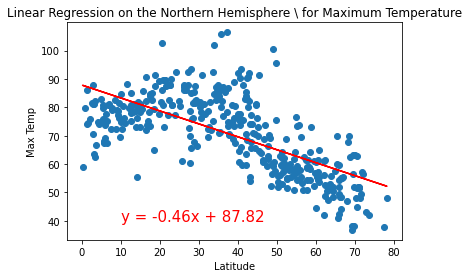

In [66]:
# Linear regression on the northern hemisphere

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Max Temp']

#Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,40))

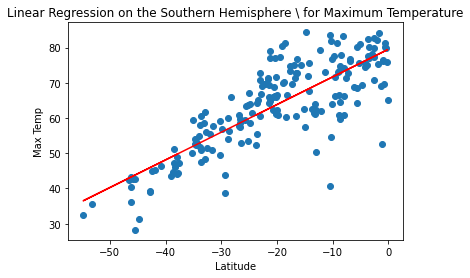

In [67]:
# Linear regression on the northern hemisphere

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Max Temp']

#Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,40))

In [71]:
south_regres = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

north_regres = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
print(north_regres, south_regres)

LinregressResult(slope=-0.45545536855321755, intercept=87.81856304384304, rvalue=-0.6751138244565263, pvalue=1.0913365617853784e-50, stderr=0.02590856853213743, intercept_stderr=1.1234813075603842) LinregressResult(slope=0.7852791633299289, intercept=79.541104226819, rvalue=0.8151918529409207, pvalue=1.82970112385048e-46, stderr=0.040691822542860544, intercept_stderr=0.9863033402000086)


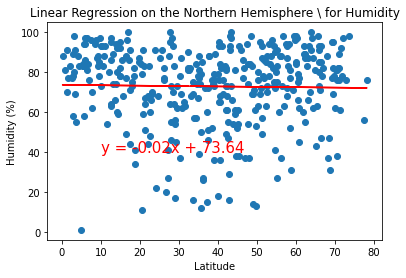

In [73]:
# Linear regression on the northern hemisphere humidity

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Humidity']

#Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Humidity', 'Humidity (%)', (10,40))

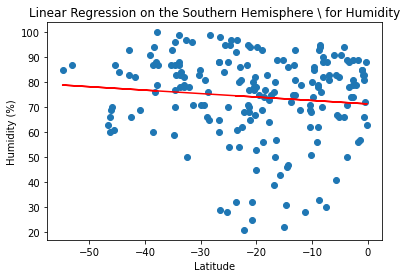

In [75]:
# Linear regression on the northern hemisphere humidity

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Humidity']

#Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Humidity', 'Humidity (%)', (-50,15))

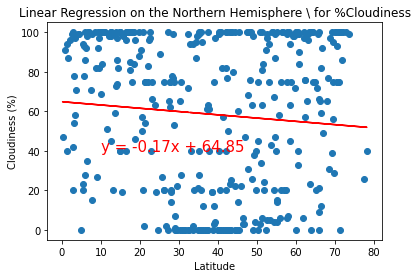

In [76]:
# Linear regression on the northern hemisphere percent cloudiness

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Cloudiness']

#Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for %Cloudiness', 'Cloudiness (%)', (10,40))

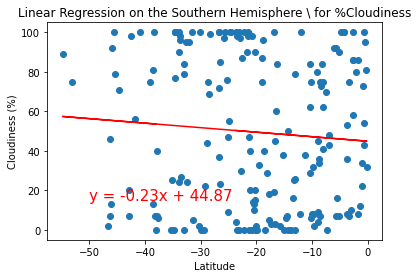

In [77]:
# Linear regression on the southern hemisphere percent cloudiness

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Cloudiness']

#Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for %Cloudiness', 'Cloudiness (%)', (-50,15))

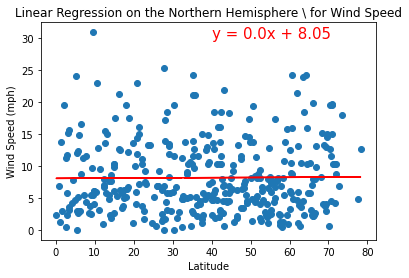

In [80]:
# Linear regression on the northern hemisphere wind speed

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Wind Speed']

#Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed (mph)', (40,30))

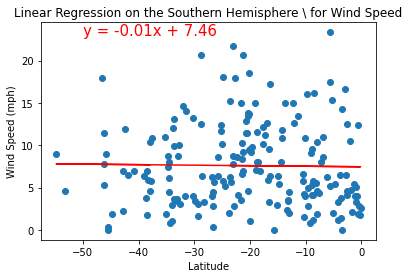

In [84]:
# Linear regression on the southern hemisphere wind speed

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Wind Speed']

#Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed (mph)', (-50,23))

In [85]:
#Ask the customer to add a minimum and maximum temperature value

min_temp = float(input('What is the minimum temperature you would like for your trip? '))

max_temp = float(input('What is the maximum temperature you would like for your trip? '))

What is the minimum temperature you would like for your trip75
What is the maximum temperature you would like for your trip90


In [86]:
#Filter the dataaset to find the cities that fit the criteria.

preferred_cities_df = city_data_df.loc[(city_data_df['Max Temp'] <= max_temp) &(city_data_df['Max Temp'] >= min_temp)]

preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
8,8,Cururupu,BR,2022-08-08 23:03:51,-1.8283,-44.8683,75.36,89,8,4.72
10,10,Panipat,IN,2022-08-08 23:03:52,29.3889,76.9681,81.70,73,22,5.84
12,12,Mamallapuram,IN,2022-08-08 23:02:18,12.6264,80.1722,85.05,64,100,15.48
14,14,Cozumel,MX,2022-08-08 23:00:51,20.5083,-86.9458,86.00,79,50,5.99
17,17,Hilo,US,2022-08-08 23:03:59,19.7297,-155.0900,89.28,85,100,1.01
20,20,Kapaa,US,2022-08-08 23:04:00,22.0752,-159.3190,87.78,68,75,10.36
26,26,Victoria,HK,2022-08-08 23:04:00,22.2855,114.1577,82.45,83,96,11.01
27,27,Ewa Beach,US,2022-08-08 23:04:07,21.3156,-158.0072,89.55,51,75,15.01
30,30,Aripuana,BR,2022-08-08 23:04:10,-9.1667,-60.6333,81.36,56,80,0.76
32,32,Butaritari,KI,2022-08-08 23:04:12,3.0707,172.7902,81.01,80,78,15.17


In [87]:
preferred_cities_df.count()

City_ID       182
City          182
Country       182
Date          182
Lat           182
Lng           182
Max Temp      182
Humidity      182
Cloudiness    182
Wind Speed    182
dtype: int64

In [88]:
#Create a DataFrame called hote_df to store hotel names along with city, country, max temp and coordinates

hotel_df = preferred_cities_df[['City', 'Country', 'Max Temp', 'Lat', 'Lng']].copy()

hotel_df['Hotel Name'] = ''

hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
8,Cururupu,BR,75.36,-1.8283,-44.8683,
10,Panipat,IN,81.70,29.3889,76.9681,
12,Mamallapuram,IN,85.05,12.6264,80.1722,
14,Cozumel,MX,86.00,20.5083,-86.9458,
17,Hilo,US,89.28,19.7297,-155.0900,


In [100]:
#set the parametes to search for a hotel 
from places import g_key

params = { 

'radius': 5000,
'type': 'lodging',
'key': g_key
}